# 4 - Matplotlib

**Summary**
> * Your first plots
>> * Plotting a function
>> * Histogram
>> * Dispersion plot
>> * Heatmaps
> * Plot customization
>> * Labels
>> * Lines and markers
>> * Legend
> * Multiple plots

> * Saving plots

Matplotlib tutorials: https://matplotlib.org/3.1.1/tutorials/index.html

## Your first plots

`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like MATLAB.

To import the module see below. As for Numpy there is a standard way to call the reference of matplotlib.pyplot in your program, which is `plt`.

In [25]:
import matplotlib.pyplot as plt  

import numpy as np 

Below we show the four main kinds of plot that are typically used: `plot`, `hist`, `scatter`, `imshow`.

### Plotting a function

Let's imagine that we have a physical process that is generating, for example, a damped oscillation. The functional form of it is the following:

In [26]:
def f(x):
  # Note that numpy knows a good approximation of pi!
  return np.exp(-2*x) * np.cos(6*np.pi*x)

We want to plot this in the interval $[0,1]$.. We can use numpy for generating the x values within this interval:

In [27]:
n_points = 200

data_x = np.linspace(0, 1, n_points) 

true_y = f(data_x)  # Generating also the sequence of ys from the function

# Note that we are passing the full numpy array of values (data_x) to the function.
# Within the function all the operations are applied element-wise to
# the array. This returns a second numpy array whose elements corresponds
# to the application of f() at each element of data_x

The function `plot(x, y)` interpolates the sequence of points with a line in the x-y plane. If we have enough `n_points` the result is a smooth representation of the function that we want to draw.


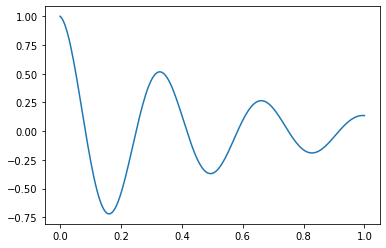

In [28]:
plt.plot(data_x, true_y)

### Histogram

Let us imagine that the physical process that we want to study is affected by experimental noise.

Here we have gaussian noise with zero mean.

In [29]:
average, sigma = 0, 0.15
noise = np.random.normal(average, sigma, n_points)

Let's check the shape of this noise. We can easily compute the histogram of the values inside the array. It should look like the usual bell-shaped curve:

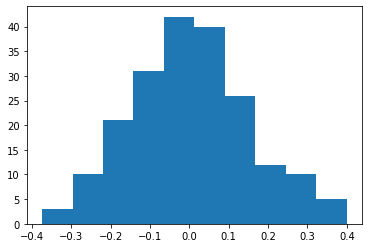

In [30]:
counts, bins, h = plt.hist(noise)

Note that the histogram returns the list of counts for each bin, `counts`, and the edges of the bins, `bins`.
For example:



In [31]:
print("There are " + str(counts[4]) + " counts in the interval [" + str(bins[4]) + ", " + str(bins[5]) + "]")

There are 42.0 counts in the interval [-0.06486459909751868, 0.012477517744970468]


### Dispersion plot

The data that we observe from our measurements is therefore the true function `f(x)` plus the `noise`.

In [32]:
data_y = true_y + noise
# Again the fact that the sum between numpy arrays works element-wise
# allows us to get result without "unpacking" the array.

The result of our measurement is therefore the following dispersion graph, that can be plotte with the method `scatter()`.

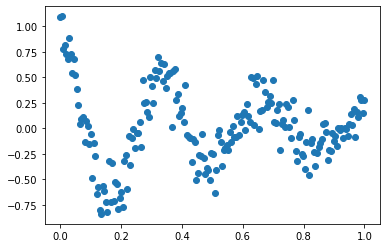

In [33]:
plt.scatter(data_x, data_y)

### Heatmap plot

Sometimes we want to plot 2D-functions. One way is to plot them as a heatmap, where the color of a given point is proportional to the value of the function there.
Let us plot the function $f(x,y) = \sin(2\pi x)/(1+y^2)$ as a heatmap.
A simple way is to create a grid of $(x_i,y_i)$ points, and compute for each of them $z_{ij} = f(x_i, y_i)$. 
We can plot the matrix $Z$ with the `heatmap` function.

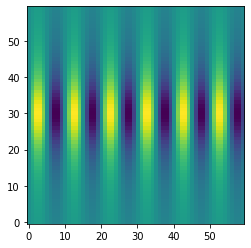

In [34]:
x = np.arange(-3.0,3.0,0.1)   # creates an array of point from -3 to 3 with distance 0.1
y = np.arange(-3.0,3.0,0.1)   # creates an array of point from -3 to 3 with distance 0.1
X,Y = np.meshgrid(x, y)       # grid of point
Z = np.sin(X*2*np.pi)/ (1+Y**2) # evaluation of (the function on the grid

plt.imshow(Z, origin='lower') # drawing the function.

Regarding the data created above, we can produce a 2d-histogram.



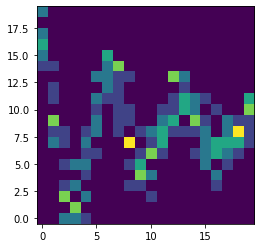

In [35]:
counts, _, _ = np.histogram2d(data_x, data_y, bins=20)
plt.imshow(counts.transpose(), origin='lower')

## Plot customization

### Labels and range

You are a physiscist! You know that you have to write the quantities your are plotting to make other people understand..

Below it is shown how to put labels on the axis, a title, and how to change th range of x and y to show in the canvas.

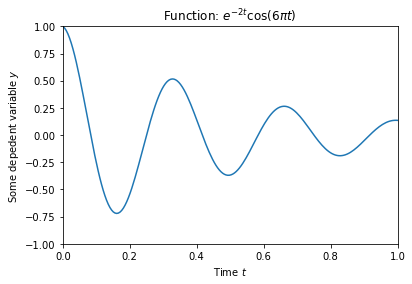

In [36]:
plt.title('Function: $e^{-2t} \cos(6 \pi t)$')  #  Title
plt.xlabel('Time $t$')  # x label
plt.ylabel('Some depedent variable $y$')  # y label

plt.xlim([0,1])  # Setting the x range
plt.ylim([-1,1])  # Setting the y range

plt.plot(data_x, true_y)

Note that you can use Latex synthax within the dollar symbols!

### Lines and markers

The plotting functions, e.g. plot or scatter, accept a huge number of properties that allows to customize your graph.

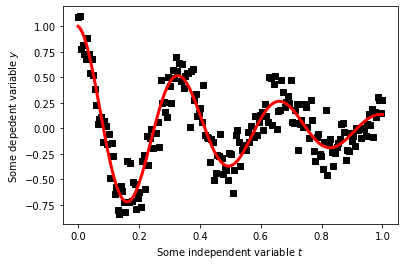

In [37]:
plt.xlabel('Some independent variable $t$')
plt.ylabel('Some depedent variable $y$')

# Two plotting functions in the same pyplot environment are plotted together in the same canvas
plt.plot(data_x, true_y, linewidth=3, color='red')
plt.scatter(data_x, data_y, marker='s', color='black')

We changed the line witdh (`linewidth` or `ls`), the colors (`color` or `c`), and the marker shape (`marker`). See the official matplotlib documentation to explore other possibilities. For example how to change the line style (`linestyle`) or the marker size (`size`).

### Legend

Multiple elements in the same plot need a legend. It requires a label for each graphic element that you are generating and the method `legend()`.

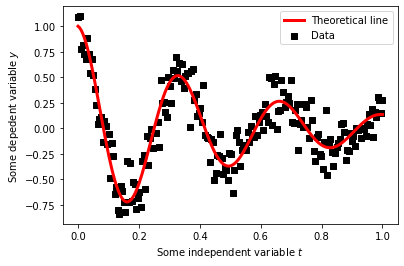

In [38]:
plt.xlabel('Some independent variable $t$')
plt.ylabel('Some depedent variable $y$')

# Labels inside the graphical objects
plt.plot(data_x, true_y, linewidth=3, color='red', label='Theoretical line')
plt.scatter(data_x, data_y, marker='s', color='black', label='Data')

# Legent keyword
plt.legend()

## Multiple plots

You can draw different plots in the same figure. The easiest way is to:
* declare that you are building a figure with `plt.figure()`.
* Before each sub-plot call the method `plt.subplot(i,j,n)`, where:
> * `i` is the number of plots in rows
> * `j` is the number of plots in columns
> * `n` is the plot number

For example:

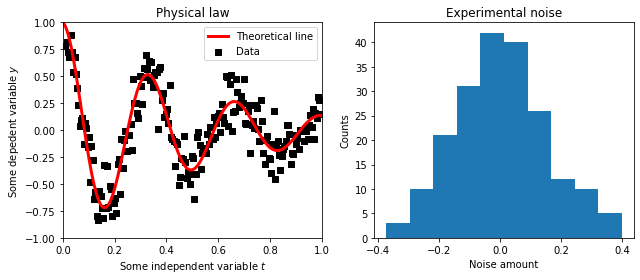

In [39]:
fig = plt.figure(figsize=(9,4)) # Here you can specify the tot size of the figure

plt.subplot(121)
plt.title('Physical law')
plt.xlabel('Some independent variable $t$')
plt.ylabel('Some depedent variable $y$')
plt.xlim([0,1])  # Setting the x range
plt.ylim([-1,1])  # Setting the y range
plt.plot(data_x, true_y, linewidth=3, color='red', label='Theoretical line')
plt.scatter(data_x, data_y, marker='s', color='black', label='Data')
plt.legend()

plt.subplot(122)
plt.title('Experimental noise')
plt.xlabel('Noise amount')
plt.ylabel('Counts')
counts, bins, h = plt.hist(noise)

plt.tight_layout() # This method allows for a better alignments of all the elements

## Saving plot

Often you will need to save a plot for future use. We can do that as follows.
Recall how you can create a folder (for example `'./figures'`) using the left menu.

In [40]:
fig_name = "./figures/test.png"
fig.savefig(fig_name, format='png', bbox_inches = "tight", pad_inches = 0.4, dpi = 600)
plt.close()

FileNotFoundError: ignored

If you save them locally only, remember that they will be lost when the colab notebook is disconnected.
Remember to download them if you don't want that!

In [41]:
import numpy as np

t = np.linspace(0,10,1000)

In [42]:
N = 10
alpha = np.random.rand(N)*2*np.pi
x0 = np.random.rand(N)

X = x0[:,None]*np.sin(t[None,:]+alpha[:,None])

In [43]:
X_norm = (X - X.mean(axis=0))/X.std(axis=0) / X.shape[0]

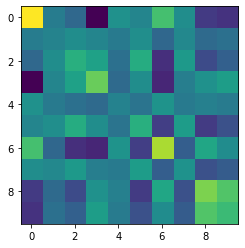

In [44]:
import matplotlib.pyplot as plt

plt.imshow(X_norm @ X_norm.T)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


(20000, 2)


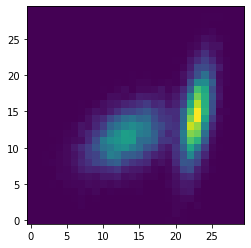

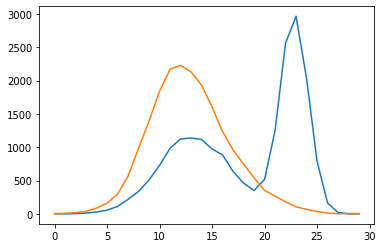

In [77]:
from matplotlib import ticker

C1 = np.array([[1,0],[2,0.5]])
X1 = np.random.multivariate_normal(mean = [0,2],cov =C1, size = 10000)
C2 = np.array([[1,0.8],[0.5,2]])
X2 = np.random.multivariate_normal(mean = [-1,-2],cov =C2, size = 10000)
X = np.append(X1,X2,axis=0)

print(X.shape)

hh, xedge, _ = np.histogram2d(X[:,0],X[:,1], bins=30)


plt.imshow(hh, origin='lower')
plt.show()
plt.plot(hh.sum(axis=0))
plt.plot(hh.sum(axis=1))


3.0


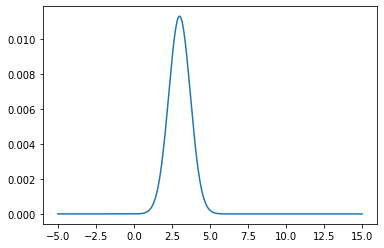

-0.9999999707308868


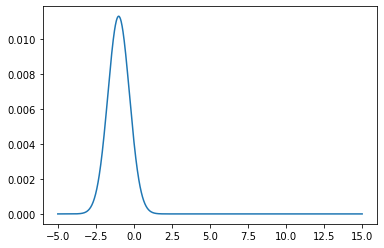

0.9999999999999999


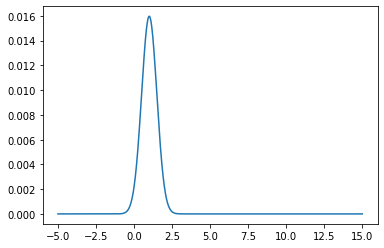

In [88]:
x = np.random.